# Worksheet 08

Name:  Min Han  
UID: U15822408

### Topics

- Singular Value Decomposition

You can download the image [here](https://github.com/gallettilance/CS506-Fall2022/raw/master/worksheets/boat.dat)

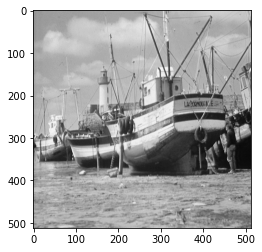

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

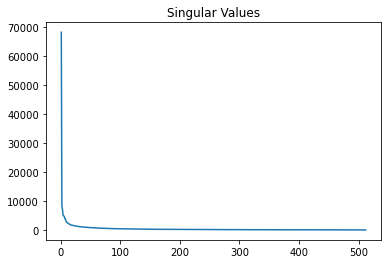

In [3]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.plot(range(1, len(s) + 1), s)
plt.title('Singular Values')
plt.show()

Notice you can get the image back by multiplying the matrices back together:

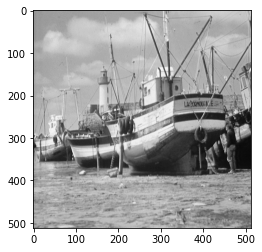

In [4]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [5]:
scopy = s.copy()
scopy[10:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

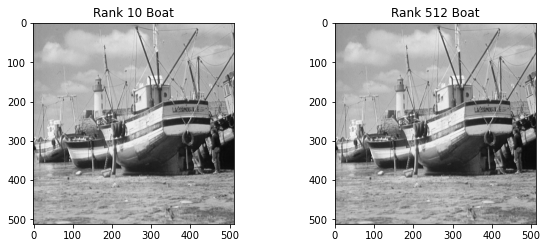

In [6]:
boat_app = u.dot(np.diag(s)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 10 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

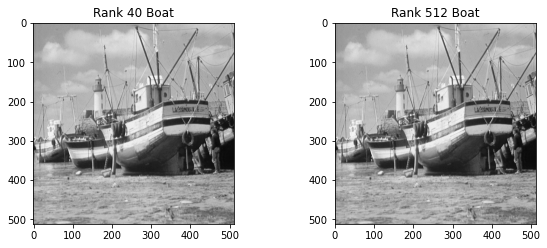

In [11]:
scopy = s.copy()
scopy[40:] = 0.0

boat_app = u.dot(np.diag(s)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

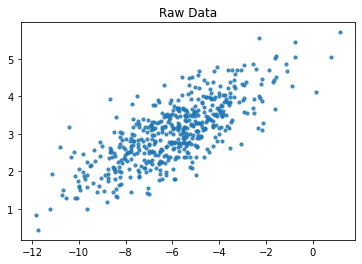

In [89]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

#print(X)

e) Mean-center the data and plot it.

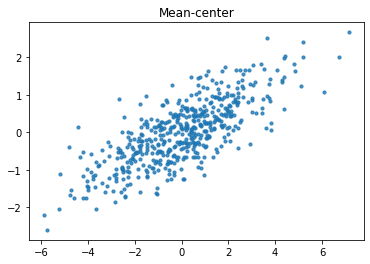

In [90]:
Xc = X - np.mean(X, axis = 0)
#X = (X-X.mean())/X.std()

plt.scatter(Xc[:, 0], Xc[:, 1], s=10, alpha=0.8)
plt.title("Mean-center")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [91]:
u, s, vt = np.linalg.svd(Xc, full_matrices=False)
#plt.plot(range(1, len(s)+1), s, 'bx-')
#plt.title("Singular Vlues")
#plt.show

print(s.shape)

(2,)


There will be two singular values, because from the output of problem e, we are able to know that after svd, the shape of s is (2,). 's' is singular values, so from its shape we could know that there are two singular values.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

(2,)


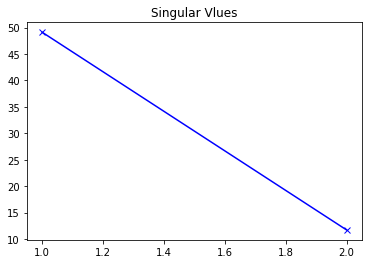

In [92]:
#u, s, vt = np.linalg.svd(Xc, full_matrices=True)
plt.plot(range(1, len(s)+1), s, 'bx-')
plt.title("Singular Vlues")
plt.show

print(s.shape)

As the image shows below, the line will lie on the part with y-axis range(10, 50), x-axis range(1, 2).The reason is that the number of singular values is two, and the values of them is inthe range of (10, 50).

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

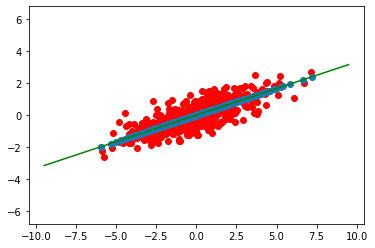

In [94]:
#u, s, vt = np.linalg.svd(Xc, full_matrices=True)
scopy = s.copy()
scopy[1] = 0.0
reducedX = u @ np.diag(scopy) @ vt
plt.axis('equal')
plt.scatter(Xc[:,0],Xc[:,1], color='r')
plt.scatter(reducedX[:,0], reducedX[:,1])
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
_ = plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

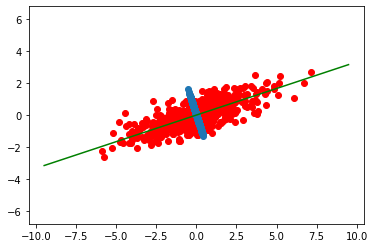

In [97]:
#u, s, vt = np.linalg.svd(Xc, full_matrices=True)
scopy = s.copy()
scopy[0] = 0.0
reducedX = u @ np.diag(scopy) @ vt
plt.axis('equal')
plt.scatter(Xc[:,0],Xc[:,1], color='r')
plt.scatter(reducedX[:,0], reducedX[:,1])
endpoints = np.array([[-10],[10]]) @ vt[[0],:]
_ = plt.plot(endpoints[:,0], endpoints[:,1], 'g-')
plt.show()

The reducedX looks different in these two image, since the singular values are different, since the singular value will represent their related data.